In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout, Softmax
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, History, ModelCheckpoint
import tensorflow as tf
import os

2023-04-26 17:17:46.341766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sequences = np.load('seq_labels/sequences_pose_all.npy')
labels = np.load('seq_labels/labels_pose_all.npy')
# actions = np.array(['goodbye', 'hi', 'you', 'me', 'thankyou', 'goodmorning'])
# actions = np.array(['come', 'good', 'happy', 'home', 'iloveyou', 'sorry'])
actions = np.array(['come', 'good', 'goodbye', 'goodmorning', 'happy', 'hi', 'home', 'iloveyou', 'me', 'sorry', 'thankyou', 'you'])
# actions = np.array(['come', 'good', 'goodbye', 'goodmorning', 'happy', 'hi', 'home', 'iloveyou', 'sorry', 'thankyou'])

In [3]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [87]:
file_name = 'big_pose_1st'

In [88]:
np.random.seed(42)
tf.random.set_seed(42)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
checkpoint_callback = ModelCheckpoint(f'islr_{file_name}.h5', monitor='loss', save_best_only=True)
history = History()

In [89]:
callback = EarlyStopping(monitor='loss', patience=5, start_from_epoch = 5)

In [90]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(30, 258)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(LeakyReLU())
model.add(LSTM(64, return_sequences=False))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(actions.shape[0]))
model.add(Softmax())

In [91]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [92]:
history = model.fit(X, y, epochs=100, callbacks=[tb_callback, callback, history, checkpoint_callback], batch_size=32)

Epoch 1/100
21/21 [==============================] - 9s 92ms/step - loss: 1.7744 - categorical_accuracy: 0.2346
Epoch 2/100
21/21 [==============================] - 2s 100ms/step - loss: 1.6420 - categorical_accuracy: 0.3008
Epoch 3/100
21/21 [==============================] - 2s 108ms/step - loss: 1.4243 - categorical_accuracy: 0.3323
Epoch 4/100
21/21 [==============================] - 3s 130ms/step - loss: 1.2951 - categorical_accuracy: 0.4211
Epoch 5/100
21/21 [==============================] - 2s 108ms/step - loss: 1.2720 - categorical_accuracy: 0.4376
Epoch 6/100
21/21 [==============================] - 2s 115ms/step - loss: 1.2233 - categorical_accuracy: 0.4496
Epoch 7/100
21/21 [==============================] - 2s 106ms/step - loss: 1.0815 - categorical_accuracy: 0.5383
Epoch 8/100
21/21 [==============================] - 2s 109ms/step - loss: 0.9564 - categorical_accuracy: 0.5714
Epoch 9/100
21/21 [==============================] - 3s 129ms/step - loss: 0.9125 - categorical_a

In [100]:
model.load_weights(f'islr_{file_name}_a.h5')

In [96]:
model.save(f'islr_{file_name}_a.h5')

In [101]:
train_loss, train_acc = model.evaluate(X, y)
print('Train accuracy: ', train_acc)
print('Train loss: ', train_loss)

21/21 [==============================] - 1s 40ms/step - loss: 0.2790 - categorical_accuracy: 0.8977
Train accuracy:  0.897744357585907
Train loss:  0.27901390194892883


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            82688     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 64)            0         
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

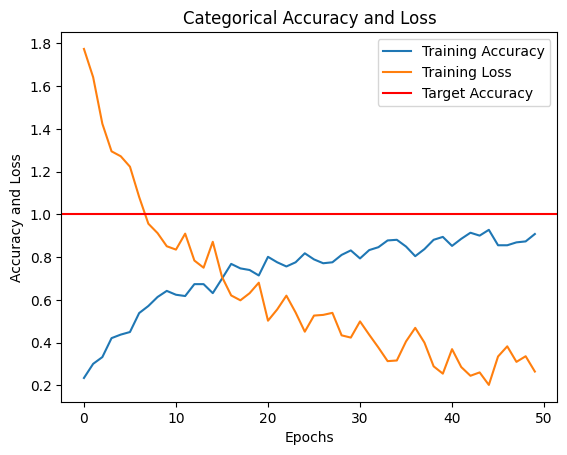

In [94]:
plt.plot(history.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(history.history['loss'],label='Training Loss')
plt.axhline(y=1, color='r', linestyle='-', label='Target Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Categorical Accuracy and Loss')
plt.legend()
# plt.savefig(f'graphs/accuracy_{file_name}.png')
plt.show()

In [95]:
ep = len(history.history['loss'])
print('Epochs: ', ep)

Epochs:  50
